In [ ]:
import gc 
import time 
import numpy as np 
import pandas as pd 
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder 
from pandas import DataFrame as DF

In [ ]:
data = pd.read_csv('../data/UserMovie_train.txt',sep='\t')

In [9]:
data

,uid,mid,timeStamp,star
0,1722994,1306505,2007-08-22,5.0
1,1405477,10574468,2013-04-24,4.0
2,15849871,4910186,2011-12-20,5.0
3,1068524,1304643,2006-02-07,3.0
4,1307041,1851857,2008-09-22,4.0
5,1700174,3324130,2010-11-23,4.0
6,16124523,6860160,2013-03-10,4.0
7,1562429,1296339,2007-05-28,5.0
8,1475205,1907467,2008-06-01,4.0
9,17734699,10574622,2012-12-20,4.0


In [ ]:
mid = data['mid'].unique()
uid = data['uid'].unique()
collect_mid_encoder = {}
collect_mid_dencoder = {}
collect_uid_encoder = {}
collect_uid_dencoder = {}
for i in range(len(mid)):
    collect_mid_encoder[i] = mid[i]
    collect_mid_dencoder[mid[i]] = i
for i in range(len(uid)):
    collect_uid_encoder[i] = uid[i]
    collect_uid_dencoder[uid[i]] = i
data['mid'] = data['mid'].map(lambda x:collect_mid_dencoder[x])
data['uid'] = data['uid'].map(lambda x:collect_uid_dencoder[x])

In [ ]:
user_matrix = np.zeros((len(uid),len(mid)),dtype='float16')
item_matrix = np.zeros((len(mid),len(uid)),dtype='float16')
DF(user_matrix,dtype=np.uint16).info()
to_make = np.array(data[['uid','mid','star']].values,dtype=np.uint32)
for i in range(len(to_make)):
    if i%1000000 == 0:
        print(i)
    user_matrix[to_make[i][0],to_make[i][1]] = to_make[i][2]
    item_matrix[to_make[i][1],to_make[i][0]] = to_make[i][2]

In [ ]:
value = DF(to_make)

In [ ]:
value

In [ ]:
movie_count = value[1].value_counts()

In [ ]:
movie_count

In [ ]:
f = open (r'../data/count_movie.txt','w')
print (movie_count,file = f)
f.close()

In [ ]:
movie_per_num = movie_count.values

In [ ]:
movie_per_num

In [ ]:
import matplotlib.pyplot as plt
x1 = range(0,72656)

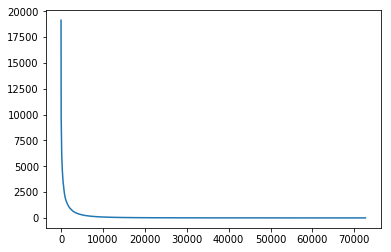

In [40]:
plt.plot(x1,movie_per_num) 
plt.savefig('movie_count.png')

In [62]:
movie_count = pd.read_csv('../data/movie_count.txt',sep=',',header=None)

In [63]:
movie_count

,0,1
0,426,19133
1,172,17849
2,1040,15947
3,949,15567
4,936,15259
5,289,14866
6,1290,13970
7,630,13207
8,454,12694
9,723,12645


In [64]:
movie_head = movie_count[0:1000]

In [65]:
movie_head

,0,1
0,426,19133
1,172,17849
2,1040,15947
3,949,15567
4,936,15259
5,289,14866
6,1290,13970
7,630,13207
8,454,12694
9,723,12645


In [66]:
movie_head.to_csv('../data/movie_head.txt')

In [67]:
sum(movie_head[1])

4226372

In [68]:
sum(movie_count[1])

8777260